# Blizzard Commodities DataFrame (79+M rows)

## Data pulled hourly between 2023-12-22 19:41:00 and 2024-01-03 12:41:00

## Imports Section

In [107]:
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import json
import os
import numpy as np
import statistics
import ctypes
from datetime import datetime
from random import sample

## Open csv / Load to DF

In [2]:
start=datetime.now()
display(f"({start}) Loading csv file ...")
Blizzard_Commodities_DF=pd.read_csv('commodities_data.csv')
Blizzard_Commodities_DF.shape
display(f"(Time to load : {datetime.now()-start}")

'(2024-01-08 19:29:24.143558) Loading csv file ...'

'(Time to load : 0:01:20.371508'

## Find na/NaN values

In [3]:
Blizzard_Commodities_DF.isna().sum()

id            0
quantity      0
unit_price    0
time_left     0
item.id       0
item.name     0
item.class    0
datetime      0
dtype: int64

## DF Structure (Review/Correct)

In [4]:
Blizzard_Commodities_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79852830 entries, 0 to 79852829
Data columns (total 8 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   id          int64 
 1   quantity    int64 
 2   unit_price  int64 
 3   time_left   object
 4   item.id     int64 
 5   item.name   object
 6   item.class  object
 7   datetime    object
dtypes: int64(4), object(4)
memory usage: 4.8+ GB


In [5]:
start=datetime.now()

In [6]:
# Change datedime columns to datetime
Blizzard_Commodities_DF['datetime'] = pd.to_datetime(Blizzard_Commodities_DF['datetime'])

In [7]:
# Change id columns to string
display(f"({start}) Re-Casting id columns ...")
Blizzard_Commodities_DF['id']=Blizzard_Commodities_DF['id'].astype(str)
Blizzard_Commodities_DF['item.id']=Blizzard_Commodities_DF['item.id'].astype(str)
display(f"(Time to cast : {datetime.now()-start}")

'(2024-01-08 19:31:10.686598) Re-Casting id columns ...'

'(Time to cast : 0:00:52.063704'

In [7]:
# Verifiy change
Blizzard_Commodities_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79852830 entries, 0 to 79852829
Data columns (total 8 columns):
 #   Column      Dtype         
---  ------      -----         
 0   id          object        
 1   quantity    int64         
 2   unit_price  int64         
 3   time_left   object        
 4   item.id     object        
 5   item.name   object        
 6   item.class  object        
 7   datetime    datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 4.8+ GB


## Data Overview

In [8]:
Blizzard_Commodities_DF

,id,quantity,unit_price,time_left,item.id,item.name,item.class,datetime
0,1899749198,15,109400,SHORT,184090,Potion of the Psychopomp's Speed,Consumables,2023-12-28 15:41:00
1,1899749311,1,2000,SHORT,168650,Cragscale,Trade Goods,2023-12-28 15:41:00
2,1899749353,6,2400,SHORT,152576,Tidespray Linen,Trade Goods,2023-12-28 15:41:00
3,1899749415,2,290200,SHORT,76885,Burning Primal Diamond,Gems,2023-12-28 15:41:00
4,1899749701,1,9707000,SHORT,139362,Glyph of Mana Touched Souls,Glyphs,2023-12-28 15:41:00
...,...,...,...,...,...,...,...,...
79852825,1910242848,12,25200,VERY_LONG,197755,Lava Beetle,Trade Goods,2023-12-29 00:41:00
79852826,1910242860,3,30600,VERY_LONG,191465,Saxifrage,Trade Goods,2023-12-29 00:41:00
79852827,1910242862,3,1500000,VERY_LONG,193227,Stonecrust Hide,Trade Goods,2023-12-29 00:41:00
79852828,1910242863,2,25200,VERY_LONG,197755,Lava Beetle,Trade Goods,2023-12-29 00:41:00


### Initial Value Analisys by Column

- id

In [9]:
Blizzard_Commodities_DF['id'].value_counts()

id
1892309585    50
1920662957    50
1920664843    50
1920664735    50
1892307074    50
              ..
1918269591     1
1918269568     1
1918269565     1
1918269561     1
1910242863     1
Name: count, Length: 6964297, dtype: int64

- id .. from this we can tell auctions last no more than 50 hrs, a bit over 2 days.

<Axes: xlabel='id'>

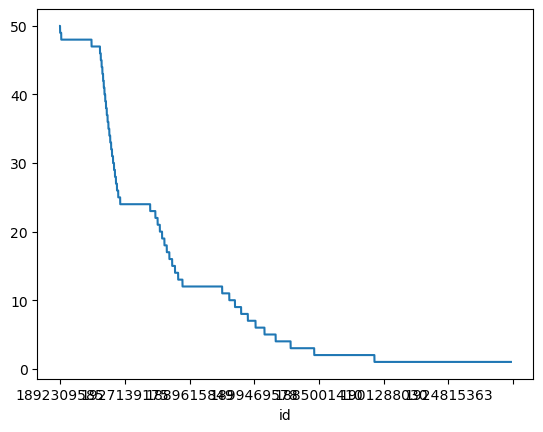

In [10]:
Blizzard_Commodities_DF['id'].value_counts().plot()

In [111]:
auction_id_cc=pd.DataFrame(Blizzard_Commodities_DF['id'].value_counts().value_counts())
auction_id_cc.rename(columns={'count':"repetitions"}, inplace=True)
auction_id_cc.reset_index(inplace=True)
auction_id_cc.sort_values('count',inplace=True)
auction_id_cc.reset_index(drop=True,inplace=True)
auction_id_cc['percentage']=(auction_id_cc['repetitions']/6964297)*100
auction_id_cc['percentage'].iloc[0:2].sum()

43.63794364312723

In [251]:
auction_id_cc['percentage'].iloc[11]

8.800443174666444

In [250]:
auction_id_cc

,count,repetitions,percentage
0,1,2109005,30.283100
1,2,930071,13.354844
2,3,364507,5.233938
3,4,231023,3.317248
4,5,172418,2.475742
5,6,138057,1.982354
6,7,119175,1.711228
7,8,103680,1.488736
8,9,95134,1.366024
9,10,87794,1.260630


In [86]:
xticks=[]
for x in range(26):
    xticks.append(x*2)
yticks=[]
for y in range(12):
    yticks.append(y*200000)
    

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


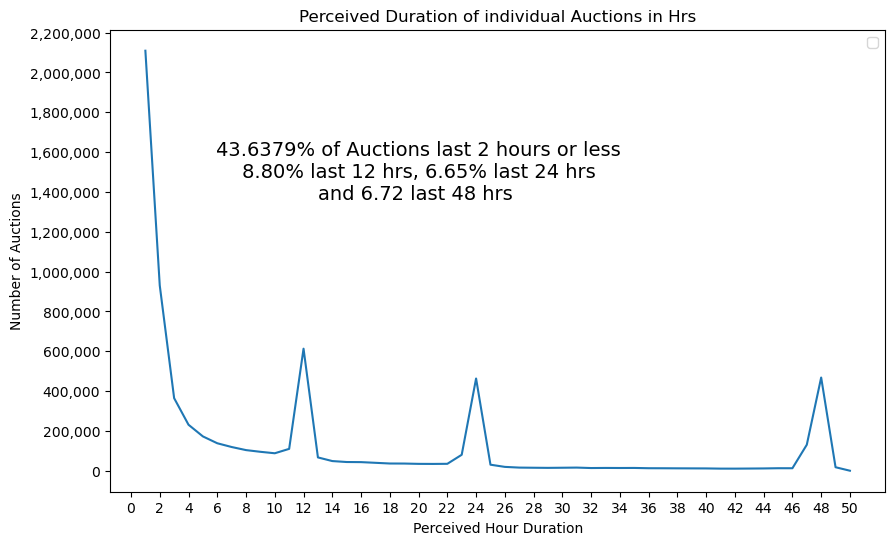

In [254]:
y=auction_id_cc['repetitions']
x=auction_id_cc['count']
fig, ax = plt.subplots(figsize=(10, 6)) #, layout='constrained'
plt.xticks(xticks)
plt.yticks(yticks)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter("{x:,.0f}"))

ax.plot(x, y)  # Plot some data on the axes.
ax.set_xlabel('Perceived Hour Duration')  # Add an x-label to the axes.
ax.set_ylabel('Number of Auctions')  # Add a y-label to the axes.
ax.set_title("Perceived Duration of individual Auctions in Hrs")  # Add a title to the axes.
ax.text(20,1500000,f"{auction_id_cc['percentage'].iloc[0:2].sum():.4f}% of Auctions last 2 hours or less\n8.80% last 12 hrs, 6.65% last 24 hrs\nand 6.72 last 48 hrs ",ha='center', va='center', fontsize=14)
ax.legend()  # Add a legend.

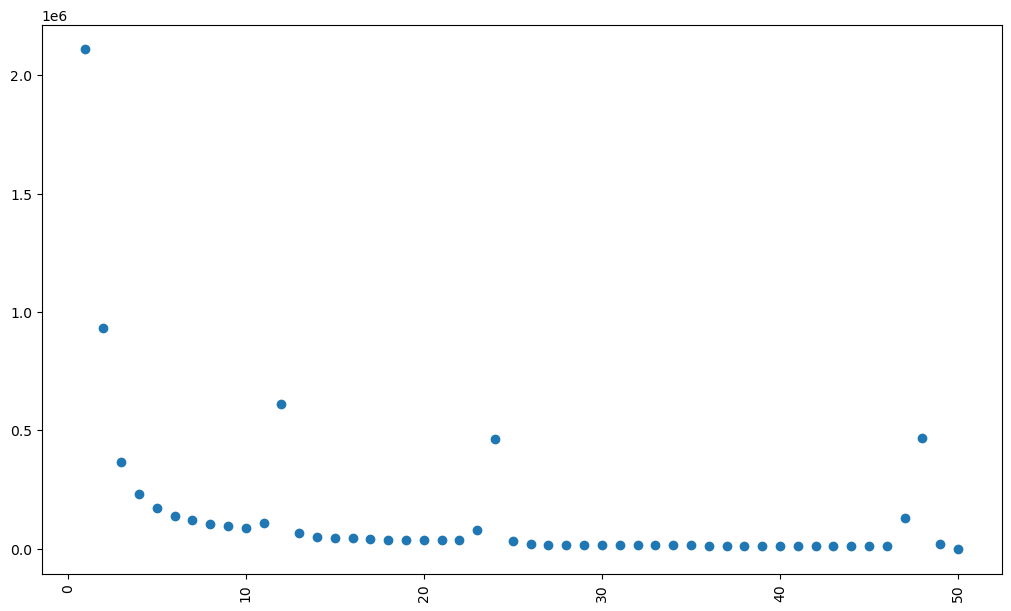

In [96]:
# plt.xlim=(0,100)
x=auction_id_cc['count']
y=auction_id_cc['repetitions']
fig, ax = plt.subplots(figsize=(10, 6), layout='constrained')
plt.scatter(x,y)
plt.xticks(rotation='vertical')
plt.show()


- quantity

In [237]:

auction_quantity_cc=pd.DataFrame(Blizzard_Commodities_DF['quantity'].value_counts().value_counts())
auction_quantity_cc.rename(columns={'count':"repetitions"}, inplace=True)
auction_quantity_cc.reset_index(inplace=True)
auction_quantity_cc.rename(columns={'count':"quantity"}, inplace=True)
auction_quantity_cc.sort_values('quantity',inplace=True)
auction_quantity_cc.reset_index(drop=True,inplace=True)
auction_quantity_cc['percentage']=(auction_quantity_cc['repetitions']/auction_id_cc['repetitions'].sum())*100
auction_quantity_cc
auction_quantity_cc

,quantity,repetitions,percentage
0,1,3482,0.049998
1,2,2805,0.040277
2,3,1025,0.014718
3,4,704,0.010109
4,5,494,0.007093
...,...,...,...
1673,4226175,1,0.000014
1674,5073014,1,0.000014
1675,6293980,1,0.000014
1676,10361141,1,0.000014


<Axes: >

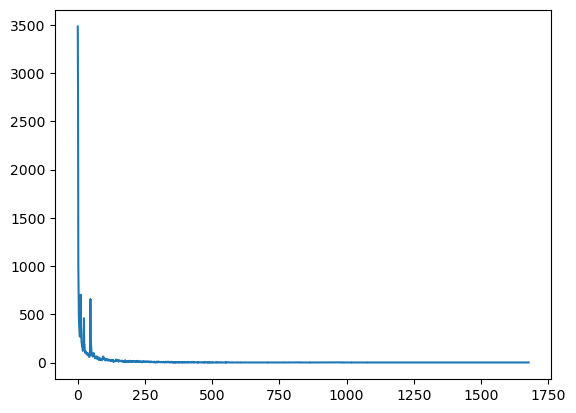

In [243]:
# auction_quantity_cc[['quantity','repetitions']].plot()
# auction_quantity_cc['quantity'].plot()
auction_quantity_cc['repetitions'].plot()

<Axes: >

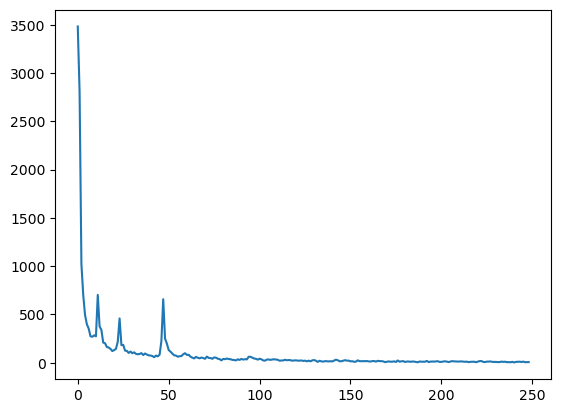

In [244]:
auction_quantity_cc['repetitions'].loc[auction_quantity_cc['quantity']<250].plot()

<Axes: >

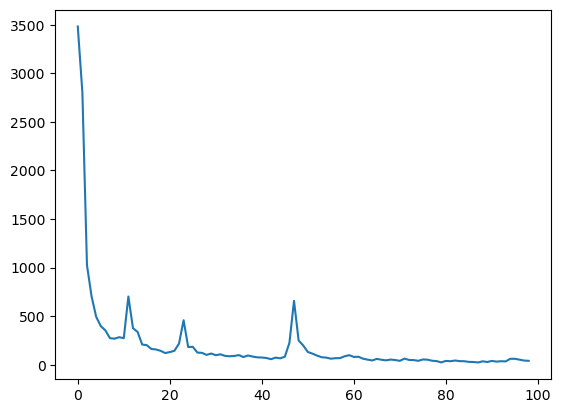

In [245]:
auction_quantity_cc['repetitions'].loc[auction_quantity_cc['quantity']<100].plot()

In [260]:
Blizzard_Commodities_DF['id'].value_counts()

id
1892309585    50
1920662957    50
1920664843    50
1920664735    50
1892307074    50
              ..
1918269591     1
1918269568     1
1918269565     1
1918269561     1
1910242863     1
Name: count, Length: 6964297, dtype: int64

In [248]:
auction_quantity_cc['repetitions'].loc[auction_quantity_cc['quantity']<100].sum()/auction_quantity_cc['quantity'].sum()*100

0.025355964906733582

In [259]:
Blizzard_Commodities_DF.loc[Blizzard_Commodities_DF['id']=='1920664843'].sort_values('datetime')

,id,quantity,unit_price,time_left,item.id,item.name,item.class,datetime
64489955,1920664843,20,16400,VERY_LONG,118391,Worm Supreme,Consumables,2023-12-31 14:41:00
22409170,1920664843,20,16400,VERY_LONG,118391,Worm Supreme,Consumables,2023-12-31 15:41:00
78417207,1920664843,20,16400,VERY_LONG,118391,Worm Supreme,Consumables,2023-12-31 16:41:00
31915672,1920664843,20,16400,VERY_LONG,118391,Worm Supreme,Consumables,2023-12-31 17:41:00
65253229,1920664843,20,16400,VERY_LONG,118391,Worm Supreme,Consumables,2023-12-31 18:41:00
24848796,1920664843,20,16400,VERY_LONG,118391,Worm Supreme,Consumables,2023-12-31 19:41:00
73288659,1920664843,20,16400,VERY_LONG,118391,Worm Supreme,Consumables,2023-12-31 20:41:00
33564140,1920664843,20,16400,VERY_LONG,118391,Worm Supreme,Consumables,2023-12-31 21:41:00
62446198,1920664843,20,16400,VERY_LONG,118391,Worm Supreme,Consumables,2023-12-31 22:41:00
27365367,1920664843,20,16400,VERY_LONG,118391,Worm Supreme,Consumables,2023-12-31 23:41:00


## Let's start analysing quantity offered, auction duration and  offered quantity changed

### Get a list of unique id's

In [290]:
list_of_ids=Blizzard_Commodities_DF['id'].unique()
list_of_ids

array(['1899749198', '1899749311', '1899749353', ..., '1910242860',
       '1910242862', '1910242863'], dtype=object)

### Record Auction id, item.name, auction perceived duration, initial offered quantity, quantity difference on last entry

In [291]:
# first attempt before droping rows:  3666 ids in 155m 51.6s
auction_change_by_id=[]
progress=0
printed_text=""
total=len(list_of_ids)
for id in list_of_ids:
    temp_auction_list=Blizzard_Commodities_DF.loc[Blizzard_Commodities_DF['id']==id] \
        .sort_values('datetime')
    auction={'id':id, 
             'item.name':temp_auction_list.iloc[0]['item.name'], 
             'duration':len(temp_auction_list), 
             'offered':temp_auction_list.iloc[0]['quantity'],
             'sold':temp_auction_list.iloc[0]['quantity']- \
                temp_auction_list.iloc[-1]['quantity']
             }
    auction_change_by_id.append(auction)
    for index in temp_auction_list.index:
        Blizzard_Commodities_DF.drop(index,axis=0)
    progress+=1
    printed_text=printed_text+f"{progress}/{total} ,"
    if len(printed_text)>80:
        print("\n", end='')
        printed_text=""

    print(f"{progress}/{total} DF Size {len(Blizzard_Commodities_DF)},", end='')

KeyboardInterrupt: 

In [279]:
temp_auction_list

,id,quantity,unit_price,time_left,item.id,item.name,item.class,datetime
6173380,1900058786,153,15200,VERY_LONG,127759,Felblight,Trade Goods,2023-12-26 17:41:00
58319770,1900058786,153,15200,VERY_LONG,127759,Felblight,Trade Goods,2023-12-26 18:41:00
10024872,1900058786,153,15200,VERY_LONG,127759,Felblight,Trade Goods,2023-12-26 19:41:00
41386050,1900058786,153,15200,VERY_LONG,127759,Felblight,Trade Goods,2023-12-26 20:41:00
8902299,1900058786,153,15200,VERY_LONG,127759,Felblight,Trade Goods,2023-12-26 21:41:00
55145357,1900058786,153,15200,VERY_LONG,127759,Felblight,Trade Goods,2023-12-26 22:41:00
12233855,1900058786,153,15200,VERY_LONG,127759,Felblight,Trade Goods,2023-12-26 23:41:00
67157321,1900058786,153,15200,VERY_LONG,127759,Felblight,Trade Goods,2023-12-27 00:41:00
19510250,1900058786,153,15200,VERY_LONG,127759,Felblight,Trade Goods,2023-12-27 01:41:00
72150326,1900058786,153,15200,VERY_LONG,127759,Felblight,Trade Goods,2023-12-27 02:41:00


In [265]:
temp_auction_list=Blizzard_Commodities_DF.loc[Blizzard_Commodities_DF['id']=='1920664843'].sort_values('datetime')
temp_auction_list

,id,quantity,unit_price,time_left,item.id,item.name,item.class,datetime
64489955,1920664843,20,16400,VERY_LONG,118391,Worm Supreme,Consumables,2023-12-31 14:41:00
22409170,1920664843,20,16400,VERY_LONG,118391,Worm Supreme,Consumables,2023-12-31 15:41:00
78417207,1920664843,20,16400,VERY_LONG,118391,Worm Supreme,Consumables,2023-12-31 16:41:00
31915672,1920664843,20,16400,VERY_LONG,118391,Worm Supreme,Consumables,2023-12-31 17:41:00
65253229,1920664843,20,16400,VERY_LONG,118391,Worm Supreme,Consumables,2023-12-31 18:41:00
24848796,1920664843,20,16400,VERY_LONG,118391,Worm Supreme,Consumables,2023-12-31 19:41:00
73288659,1920664843,20,16400,VERY_LONG,118391,Worm Supreme,Consumables,2023-12-31 20:41:00
33564140,1920664843,20,16400,VERY_LONG,118391,Worm Supreme,Consumables,2023-12-31 21:41:00
62446198,1920664843,20,16400,VERY_LONG,118391,Worm Supreme,Consumables,2023-12-31 22:41:00
27365367,1920664843,20,16400,VERY_LONG,118391,Worm Supreme,Consumables,2023-12-31 23:41:00


In [273]:
auction={'id':temp_auction_list.iloc[0]['id'], 
             'item.name':temp_auction_list.iloc[0]['item.name'], 
             'duration':len(temp_auction_list), 
             'offered':temp_auction_list.iloc[0]['quantity'],
             'sold':temp_auction_list.iloc[0]['quantity']-temp_auction_list.iloc[-1]['quantity']
             }
auction

{'id': '1920664843',
 'item.name': 'Worm Supreme',
 'duration': 50,
 'offered': 20,
 'sold': 0}

In [270]:
len(temp_auction_list)

50

In [271]:
temp_auction_list.iloc[0]['item.name']

'Worm Supreme'

In [226]:
# Evenly distributed bins did not work
# bins=[]
# bin_index=[]
# for b in range(18):
#     bins.append(b*100)
#     bin_index.append(b*100)
bins=[0,100,200,500,1000,2000,5000,10000,20000,50000,100000,200000,500000,1000000,20000000]
len(bins)

15

In [227]:

binned_auction_quantity=pd.DataFrame(auction_quantity_cc.groupby(pd.cut(auction_quantity_cc['quantity'],bins)).size())
binned_auction_quantity.reset_index(inplace=True, drop=True)
binned_auction_quantity.rename(columns={0:'repetitions'}, inplace=True)
binned_auction_quantity['percentage']=(binned_auction_quantity['repetitions']/binned_auction_quantity['repetitions'].sum())*100

C:\Users\Fidel\AppData\Local\Temp\ipykernel_7592\88329472.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_auction_quantity=pd.DataFrame(auction_quantity_cc.groupby(pd.cut(auction_quantity_cc['quantity'],bins)).size())


In [228]:
binned_auction_quantity['repetitions'].sum()
binned_auction_quantity

,repetitions,percentage
0,100,5.963029
1,100,5.963029
2,289,17.233154
3,238,14.192010
4,314,18.723912
5,306,18.246869
6,102,6.082290
7,85,5.068575
8,62,3.697078
9,30,1.788909


In [229]:
# xticks=[]
# for x in range(26):
#     xticks.append(x*2)
# yticks=[]
# for y in range(12):
#     yticks.append(y*200000)    

In [236]:
x,bins

(['(0, 100]',
  '(100, 200]',
  '(200, 300]',
  '(300, 400]',
  '(400, 500]',
  '(500, 600]',
  '(600, 700]',
  '(700, 800]',
  '(800, 900]',
  '(900, 1000]',
  '(1000, 1100]',
  '(1100, 1200]',
  '(1200, 1300]',
  '(1300, 1400]',
  '(1400, 1500]',
  '(1500, 1600]',
  '(1600, 1700]'],
 [0,
  100,
  200,
  500,
  1000,
  2000,
  5000,
  10000,
  20000,
  50000,
  100000,
  200000,
  500000,
  1000000,
  20000000])

In [ ]:
x[0]='(0,200]'
x[1]='(200,500]'

ValueError: x and y must have same first dimension, but have shapes (15,) and (14,)

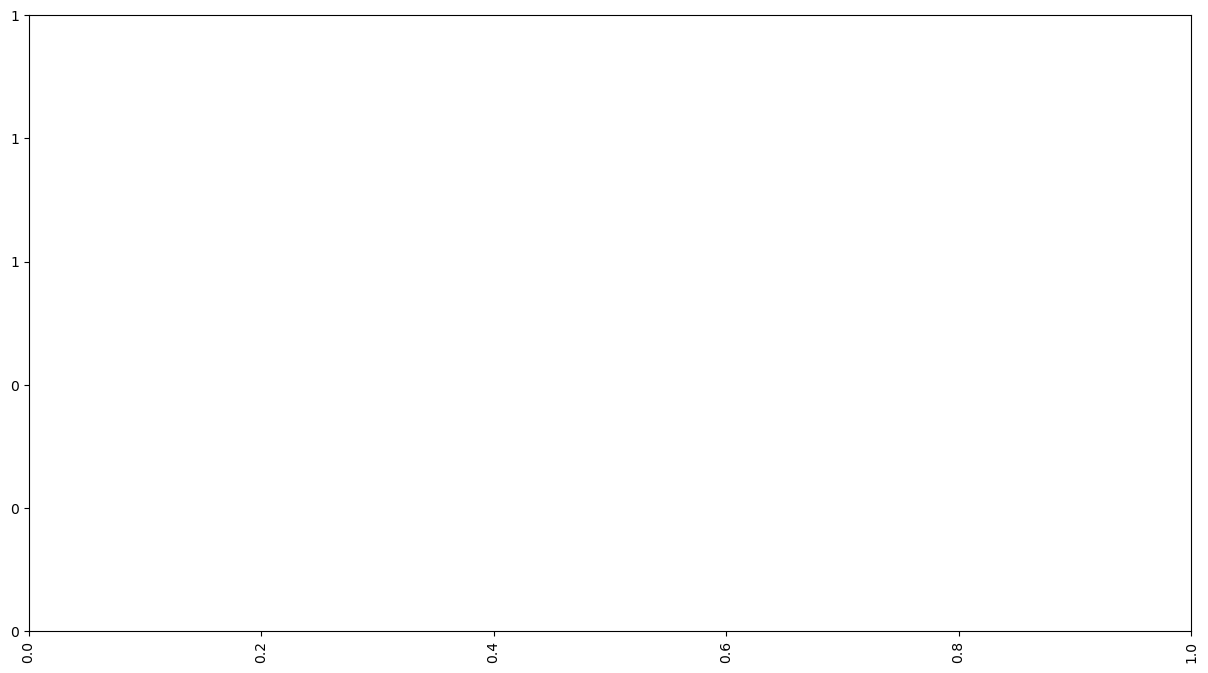

In [232]:
plt.xlim=(0,100)
# y=[]
# for bin_range in binned_auction_quantity['quantity']:
#     y.append(str(bin_range))
y=binned_auction_quantity['repetitions']
fig, ax = plt.subplots(figsize=(15, 8)) #, layout='constrained'
# plt.xticks(xticks)
# plt.yticks(yticks)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter("{x:,.0f}"))
plt.xticks(rotation='vertical')
ax.plot(bins, y)  # Plot some data on the axes.
ax.set_xlabel('Perceived Hour Duration')  # Add an x-label to the axes.
ax.set_ylabel('Number of Auctions')  # Add a y-label to the axes.
ax.set_title("Perceived Duration of individual Auctions in Hrs")  # Add a title to the axes.
# ax.text(20,1500000,f"{auction_id_cc['percentage'].iloc[0:2].sum():.4f}% of Auctions last 2 hours or less",ha='center', va='center', fontsize=14)
# ax.legend()  # Add a legend.

In [ ]:
Blizzard_Commodities_DF['quantity'].value_counts().plot()

- unit_price

In [ ]:
Blizzard_Commodities_DF['unit_price'].value_counts()

In [ ]:
Blizzard_Commodities_DF['unit_price'].value_counts().plot()

- time_left

In [ ]:
Blizzard_Commodities_DF['time_left'].value_counts()

In [ ]:
Blizzard_Commodities_DF['time_left'].value_counts().plot()

- item.id

- item.name

In [ ]:
Blizzard_Commodities_DF['item.name'].value_counts() 

In [ ]:
Blizzard_Commodities_DF['item.name'].value_counts().plot()

- item.class

In [ ]:
Blizzard_Commodities_DF['item.class'].value_counts()

In [ ]:
Blizzard_Commodities_DF['item.class'].value_counts().plot()

- date_time

In [ ]:
Blizzard_Commodities_DF['datetime'].value_counts()

In [ ]:
Blizzard_Commodities_DF['datetime'].value_counts().plot()

### ** Modify DF for easier analysis of datetime data

In [ ]:
Blizzard_Commodities_DF['date']=pd.to_datetime(Blizzard_Commodities_DF['datetime']).dt.date
Blizzard_Commodities_DF['date']=pd.to_datetime(Blizzard_Commodities_DF['date'])
Blizzard_Commodities_DF['time']=pd.to_datetime(Blizzard_Commodities_DF['datetime']).dt.time
# Blizzard_Commodities_DF.drop(columns='datetime', inplace=True)

In [ ]:
Blizzard_Commodities_DF.info()

## Divide Blizzard_Commodities_DF in Blizzard_1 and Blizzard_2 

## and save as CSV to close the DF and use less memory

In [ ]:
Blizzard_1_df=Blizzard_Commodities_DF.iloc[0:int(79852830/2)]
Blizzard_1_df.to_csv('Blizzard_1.csv')
Blizzard_2_df=Blizzard_Commodities_DF.iloc[int(79852830/2):]
Blizzard_2_df.to_csv('Blizzard_2.csv')
Blizzard_Commodities_DF=[]
Blizzard_2_df=[]

- date

In [ ]:
Blizzard_Commodities_DF['date'].value_counts()

In [ ]:
Blizzard_Commodities_DF['date'].value_counts().plot()

- time

In [ ]:
Blizzard_Commodities_DF['time'].value_counts()

In [ ]:
Blizzard_Commodities_DF['time'].value_counts().plot()

## Analysis based on 'item.name' column

In [ ]:
item_name_count_df=pd.DataFrame(Blizzard_Commodities_DF['item.name'].value_counts())
item_name_count_df.reset_index()

### The most offered item is 'Fluorescent Fluid', analysing data

In [ ]:
fluorecent_fluid_df=Blizzard_Commodities_DF.loc[Blizzard_Commodities_DF['item.name']=='Fluorescent Fluid']

In [ ]:
#Did not work as I expected
for column in fluorecent_fluid_df:
    try:
        display(f"Columns: {column}")
        display(fluorecent_fluid_df[column].value_counts())
    except Exception as err:
        print(err)
    try:
        display(fluorecent_fluid_df[column].value_counts().plot())
    except Exception as err:
        print(err)

In [ ]:
fluorecent_fluid_df.info()

In [ ]:
fluorecent_fluid_df['id'].value_counts()

In [ ]:
fluorecent_fluid_df['id'].value_counts().plot()

In [ ]:
fluorecent_fluid_df['quantity'].value_counts()

In [ ]:
fluorecent_fluid_df['quantity'].value_counts().plot()

In [ ]:
fluorecent_fluid_df['unit_price'].value_counts()

In [ ]:
fluorecent_fluid_df['unit_price'].value_counts().plot()

In [ ]:
fluorecent_fluid_df['time_left'].value_counts()

In [ ]:
fluorecent_fluid_df['time_left'].value_counts().plot()

In [ ]:
fluorecent_fluid_df['date'].value_counts()

In [ ]:
fluorecent_fluid_df['date'].value_counts().plot()

In [ ]:
fluorecent_fluid_df['time'].value_counts()

In [ ]:
fluorecent_fluid_df['time'].value_counts().plot()

In [ ]:
time_plot=pd.DataFrame(fluorecent_fluid_df['time'].value_counts())
time_plot.info()

In [ ]:
time_plot

In [ ]:
xtick=[str(d) for d in time_plot.index]
y=time_plot['count']
plt.plot()

In [ ]:
time_plot.sort_values(0,inplace=True)
time_plot.reset_index(drop=True)
time_plot[0]=time_plot[0].astype(str)

In [ ]:
time_plot

In [ ]:
y.info()

In [ ]:
time_plot.plot()

### Find the auction(s) the lasted the longest

### (Waste of 2 hrs to process, same results as 20 sec value_counts())

In [ ]:
# get the auction(s) that was live the longest
# max=0
# id_max=0
# max_ids=[]
# for id in fluorecent_fluid_df['id'].unique():
#     display(id)
#     days=fluorecent_fluid_df['date'].loc[fluorecent_fluid_df['id']==id]
#     if len(list(set(days)))>max:
#         max=len(list(set(days)))
#         id_max=id
#     if len(list(set(days)))==max:
#         max_ids.append(id)
#         display(f"id:{id} max with :{max}")
# display(id_max, max)

In [ ]:
fluorecent_fluid_df.sort_values(['date','time'], ascending=[True,True])
fluorecent_fluid_df.head(30)

In [ ]:
fluorecent_fluid_df.tail()

In [ ]:
fluorecent_fluid_df.loc[fluorecent_fluid_df['id']==max_ids[0]].shape

In [ ]:
from random import sample
list=sample(max_ids,int(len(max_ids)/100))
for i in list:
    print(i, fluorecent_fluid_df.loc[fluorecent_fluid_df['id']==i].shape)


In [ ]:
Exceptional_Pelt_df=Blizzard_Commodities_DF.loc[Blizzard_Commodities_DF['item.name']=='Exceptional Pelt']

In [ ]:
Exceptional_Pelt_df.to_csv('Exceptional_Pelt.csv',index=False)

## Group DF by item.name

In [ ]:
Blizzard_Commodities_DF.info()

In [ ]:
now=datetime.now()
# grouped_DF=Blizzard_Commodities_DF['id','quantity','unit_price','item.name'].groupby('item.name').sum()
grouped_DF=Blizzard_Commodities_DF[['id','quantity','unit_price','item.name']]
print(F"Time elapsed {datetime.now()-now}")

In [ ]:
grouped_DF

In [ ]:
start=datetime.now()
print(f"({start}) Export item.name and (price, quantity) columns ...")

In [ ]:
# grouped_DF=Blizzard_Commodities_DF[['id','quantity','unit_price','item.name']].groupby('item.name').sum()
name_price_df=Blizzard_Commodities_DF[['item.name','unit_price']]
name_quantity_df=Blizzard_Commodities_DF[['item.name','quantity']]
print(F"Time elapsed {datetime.now()-start}")

In [ ]:
start=datetime.now()
print(f"({start}) Groupping by item.name and summing quantity and unit_price columns ...")

In [ ]:
datetime.now()
grouped_DF

In [ ]:
start=datetime.now()
print(f"({start}) Grupping by item.name and summing quantity and unit_price columns ...")

In [ ]:
name_price_df.sum()

In [ ]:
import gc

In [ ]:
del Blizzard_Commodities_DF

In [ ]:
gc.collect()

In [ ]:
blizzard_1_df=pd.read_csv('blizzard_2.csv')
blizzard_1_df

In [ ]:
blizzard_1_df.columns

In [ ]:
blizzard_1_df.drop(columns=['Unnamed: 0', 'time_left', 'item.id',
       'id', 'item.class', 'datetime', 'date', 'time'],axis=1,inplace=True)

In [ ]:
blizzard_1_df.columns

In [ ]:
now=datetime.now()
now

In [ ]:
numeric_columns_df=Blizzard_Commodities_DF[['quantity', 'unit_price', 'item.name']]

In [ ]:
groupby_df=numeric_columns_df.groupby('item.name').sum()

In [ ]:
numeric_columns_df

In [ ]:
groupby_df

In [ ]:
groupby_df['average_price']=groupby_df['unit_price']/groupby_df['quantity']

In [ ]:
groupby_df['price_mode']=statistics.mode(groupby_df['unit_price'])

In [ ]:
groupby_df.iloc[0]

In [ ]:
groupby_df.reset_index(inplace=True)

In [ ]:
groupby_df.sort_values('unit_price')